In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as sl
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D

6.25


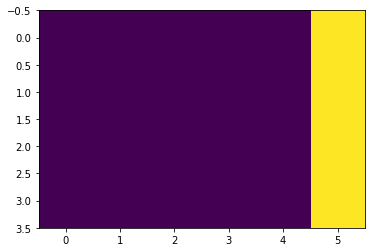

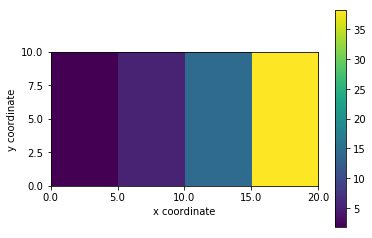

In [2]:
#Section 1.2: Jacobian Relaxation

def boundary(u):
    u[:,0]  = 0.0
    u[0,:]  = 0.0
    u[-1,:] = 0.0
    u[:,-1] = 100.0
    return u

def cfl(h):
    """2D CFL condition for equal resolution in x and y"""
    dt = h**2 / (4)
    return dt
    
#Set up the grids
h = 5.0
xdim = 20.0
ydim = 10.0
Nx = int(xdim/h)
Ny = int(ydim/h)
u = np.zeros((Ny+2,Nx+2))

#Initialize
dt = cfl(h)
u_new = np.zeros_like(u)
u = boundary(u)
plt.figure(0)
plt.imshow(u)
print(dt)

for t in range(100):
    for j in range(1,Nx+1):
        for i in range(1,Ny+1):
            #Jacobi Method Stencil
            u_new[i,j] = u[i,j] + (dt/h**2) * (u[i+1,j] - 2*u[i,j] + u[i-1,j] + u[i,j+1] - 2*u[i,j] + u[i,j-1])
    u = u_new
    u = boundary(u)
    
plt.figure(1)
plt.imshow(u[1:-1,1:-1], origin='lower')
plt.colorbar()
plt.xticks(np.linspace(-0.5,3.5,5), np.linspace(0,20,5))
plt.yticks(np.linspace(-0.5,1.5,5), np.linspace(0,10,5))
plt.xlabel('x coordinate')
plt.ylabel('y coordinate')
plt.savefig('low_res_iterative.png')

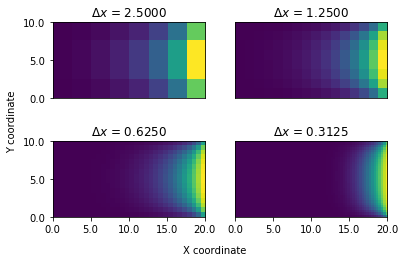

In [148]:
# Jacobian relaxation, higher resolutions
#plt.figure(8)
fig, ax = plt.subplots(2,2)

for d in range(4):
    h = 5.0 / (2**(d+1))
    xdim = 20.0
    ydim = 10.0
    Nx = int(xdim/h)
    Ny = int(ydim/h)
    u = np.zeros((Ny+2,Nx+2))
    dt = cfl(h)
    u_new = np.zeros_like(u)
    u = boundary(u)
    
    for t in range(100):
        u = boundary(u)
        for j in range(1,Nx+1):
            for i in range(1,Ny+1):
                #Same stencil as above
                u[i,j] = u[i,j] + (dt/h**2) * (u[i+1,j] - 2*u[i,j] + u[i-1,j] + u[i,j+1] - 2*u[i,j] + u[i,j-1])
      
    ax[d//2,d%2].imshow(u[1:-1,1:-1], origin='lower')
    ax[d//2,d%2].set_title('$\Delta x$ = %5.4f'%h)
    ax[d//2,d%2].set_xticks(np.linspace(-0.5, u.shape[1]-2.5, 5))
    ax[d//2,d%2].set_xticklabels(np.linspace(0, 20, 5))
    ax[d//2,d%2].set_yticks(np.linspace(-0.5, u.shape[0]-2.5, 3))
    ax[d//2,d%2].set_yticklabels(np.linspace(0, 10, 3))
ax[0,0].xaxis.set_visible(False)
#ax[0,0].set_ylabel('y coordinate')
#ax[1,0].set_xlabel('x coordinate')
ax[0,1].xaxis.set_visible(False)
ax[0,1].yaxis.set_visible(False)
ax[1,1].yaxis.set_visible(False)
fig.text(0.5, 0.04, 'X coordinate', ha='center')
fig.text(0.02, 0.5, 'Y coordinate', va='center', rotation='vertical')
fig.savefig('relaxation.png', dpi=200)

In [113]:
a = np.asarray([0, 1, 2, 3, 5])
a.size

5

5390
3809


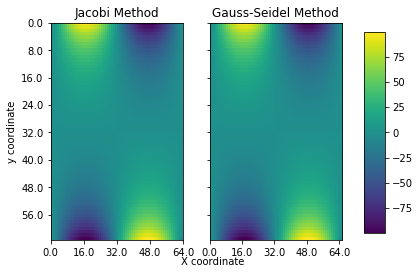

In [3]:
# Capacitor problem
np.set_printoptions(precision=8)

def cfl_2d(x_res, y_res):
    ''' NOT CORRECT, DO NOT USE'''
    dt = (x_res**2 * y_res**2) / (np.sqrt(2)* (x_res**2 + y_res**2))
    return dt

def cap_boundary(u,xx,L):
    ''' Sets the boundary conditions for the given problem
    NEED TO RE-WRTIE depending on the boundary conditions
    u - variable grid
    xx - x coordinates from meshgrid
    L  - length of the capacitor sides'''
    u[0,:]  = 100*np.sin(2*np.pi*xx[0,:]/L)
    u[-1,:]  = -100*np.sin(2*np.pi*xx[0,:]/L)
    u[:,0] = 0.0
    u[:,0] = 0.0
    return u

# ===========================================================================
#============================================================================
#   The three following methods were done the same way, could be merged into one

def jacobi(u, N, L, xx, x_res):
    '''Solves a capacitor system using the Jacobi method
    u - variable matrix
    N - number of x/y points of the u system - could be improved using u.shape
    L - size of the capacitor plate
    xx - x coordinates made from meshgrid
    x_res - the difference in x dinstance between subsequent indices'''
    dt = cfl(x_res)
    u_new = np.zeros_like(u)
    
    tiny = 1.0*10**(-8)          #Convergence criterion
    for t in range(10000): 
        u = cap_boundary(u,xx,L)
        for j in range(1,N+1):
            for i in range(1,N+1):
                # Need to change stencil for different method / D.E.
                u_new[i,j] = u[i,j] + (dt/x_res**2) * (u[i+1,j] - 2*u[i,j] + u[i-1,j] + u[i,j+1] - 2*u[i,j] + u[i,j-1])
       
        diff = np.amax(np.abs(u_new[1:-1,1:-1] - u[1:-1,1:-1]))
        #Exit the loop when the system converges
        if diff < tiny:
            break
        u[:,:] = u_new
        
    return u, t

def gauss_seidel(u, N, L, xx, x_res, y_res):
    '''Solves a capacitor system using the Gauss Seidel method
    u - variable matrix
    N - number of x/y points of the u system - could be improved using u.shape
    L - size of the capacitor plate
    xx - x coordinates made from meshgrid
    x_res - the difference in x dinstance between subsequent indices
    y_res - the difference in y distance between subsequent indices (unnecessary)'''
    dt = cfl(x_res)
    t_max = 10000
    
    tiny = 1.0*10**(-8)
    u_new = np.zeros_like(u)
    
    for t in range(t_max):
        u = cap_boundary(u, xx, L)
        u_new = cap_boundary(u_new, xx, L)
        
        for j in range(1,N+1):
            for i in range(1,N+1):
                u_new[i,j] = u[i,j] + (dt/x_res**2) * (u[i+1,j] - 2*u[i,j] + u_new[i-1,j] + u[i,j+1] - 2*u[i,j] + u_new[i,j-1])
                
        diff = np.amax(np.abs(u_new[1:-1,1:-1] - u[1:-1,1:-1]))
        if diff < tiny:
            break
        u[:,:] = u_new
         
    return u, t

L=1
N = 64
x_res = L/N
y_res = 1/N

x = np.linspace(-x_res, L+x_res, N+2)
y = np.linspace(-y_res, 1+y_res, N+2)
xx, yy = np.meshgrid(x,y)
u = np.zeros_like(xx)
u = cap_boundary(u,xx,L)

fig, ax = plt.subplots(1,2, sharey=True)
#Jacobi
u, jac_cycles = jacobi(u, N, L, xx, x_res)
print(jac_cycles)
ax[0].imshow(u, aspect='auto')
ax[0].set_title('Jacobi Method')
ax[0].set_xticks(np.linspace(-0.5,66,5))
ax[0].set_xticklabels(np.linspace(0,64,5))
ax[0].set_yticks(np.linspace(-0.5,66,9))
ax[0].set_yticklabels(np.linspace(0,64,9))
ax[0].set_ylabel('y coordinate')

#Gauss-Seidel
u = np.zeros_like(xx)
u = cap_boundary(u,xx,L)
u, gaus_cycles = gauss_seidel(u, N, L, xx, x_res, y_res)
print(gaus_cycles)
im = ax[1].imshow(u, aspect='auto')
ax[1].set_xticks(np.linspace(-0.5,64,5))
ax[1].set_xticklabels(np.linspace(0,64,5))
ax[1].set_title('Gauss-Seidel Method')

fig.text(0.5, 0.04, 'X coordinate', ha='center')
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)
fig.tight_layout
fig.savefig('capacitor_methods.png')

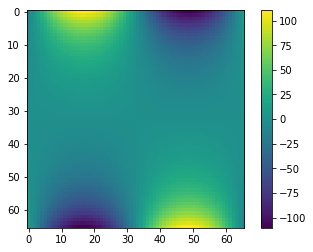

In [111]:
u_a = np.sin(2*np.pi*xx) * (100*np.cosh(2*np.pi*yy) 
                               - 100*((np.exp(np.pi)+np.exp(-np.pi))**2 / (np.exp(2*np.pi) - np.exp(-2*np.pi)))
                               *np.sinh(2*np.pi*yy))
plt.imshow(u_a)
plt.colorbar()


In [ ]:
#Schrodinger and Weighted Jacobi

import time

def sch_boundary(u):
    u[0,:] = 1
    u[-1,:] = 1
    u[:,0] = 1
    u[:,-1] = 1
    return u

def w_jacobi(u, alpha, x_res, t_max, w):
    dt = cfl(x_res)
    u_new = np.zeros_like(u)
    
    tiny = 1.0*10**(-8)
    for t in range(t_max):
        for j in range(1,N+1):
            for i in range(1,N+1):
                u_new[i,j] = u[i,j] - alpha*w*dt*u[i,j] + (w*dt/x_res**2) * (
                             u[i+1,j] - 2*u[i,j] + u[i-1,j] + u[i,j+1] 
                              - 2*u[i,j] + u[i,j-1])
       
        diff = np.amax(np.abs(u_new[1:-1,1:-1] - u[1:-1,1:-1]))
        if diff < tiny:
            break
        u[:,:] = u_new
        u = sch_boundary(u)
        
    return u, t

def diagonal_form(a, upper = 1, lower= 1):
    """
    a is a numpy square matrix
    this function converts a square matrix to diagonal ordered form
    returned matrix in ab shape which can be used directly for scipy.linalg.solve_banded
    
    This has been taken from: https://github.com/scipy/scipy/issues/8362
    """
    n = a.shape[1]
    assert(np.all(a.shape ==(n,n)))
    
    ab = np.zeros((2*n-1, n))
    
    for i in range(n):
        ab[i,(n-1)-i:] = np.diagonal(a,(n-1)-i)
        
    for i in range(n-1): 
        ab[(2*n-2)-i,:i+1] = np.diagonal(a,i-(n-1))

    mid_row_inx = int(ab.shape[0]/2)
    upper_rows = [mid_row_inx - i for i in range(1, upper+1)]
    upper_rows.reverse()
    upper_rows.append(mid_row_inx)
    lower_rows = [mid_row_inx + i for i in range(1, lower+1)]
    keep_rows = upper_rows+lower_rows
    ab = ab[keep_rows,:]


    return ab

def direct(N, xres, alpha):
    #Set up the matrices
    sq = (N+2)**2
    A = np.zeros((sq,sq))
    b = np.zeros(sq)
    x = np.zeros_like(b)
    u = np.zeros((N,N))
    c = -(4 + alpha*x_res**2)
    
    count = 0
    for i in range(N+2):        #1st u index
        for j in range(N+2):    #2nd u index
            count = (N+2)*i + j 
            if (i == 0) or (j == 0) or (i == N+1) or (j == N+1):
                A[count, (N+2)*i+j]     = 1
                b[count]   = 1
            else:
                A[count, (N+2)*(i+1)+j] = 1
                A[count, (N+2)*(i-1)+j] = 1
                A[count, (N+2)*i+(j+1)] = 1
                A[count, (N+2)*i+(j-1)] = 1
                A[count, (N+2)*i+j]     = c
                b[count]                = 0
                
    #need to use special method for banded matrix. Using the scipy solve_banded system.
    #Requires that the matrix be re-written in a better form up: # of diags above, lo: num of diags below
    up = N+2
    lo = N+2
    ab = diagonal_form(A, up, lo)
    x = sl.solve_banded((lo,up), ab, b)
    
    #Need to turn x back into a 2d array:
    u = x.reshape((N+2,N+2))
    
    return u

L=1
N = 50
x_res = L/N
y_res = 1/N

x = np.linspace(-x_res, L+x_res, N+2)
y = np.linspace(-y_res, 1+y_res, N+2)
xx, yy = np.meshgrid(x,y)
u = np.zeros_like(xx)
u = sch_boundary(u)

#Direct
np.set_printoptions(edgeitems=8)

#minimum working example:
#alpha = 0.
#N = 2
#x_res = L/N
#y_res = 1/N

#x = np.linspace(-x_res, L+x_res, N+2)
#y = np.linspace(-y_res, 1+y_res, N+2)
#xx, yy = np.meshgrid(x,y)
#u = np.zeros_like(xx)
#u = sch_boundary(u)

#u = direct(N, x_res, alpha)
#print(u)

#actual problem
alpha = 1.
time_start = time.time()
u_first = direct(N, x_res, alpha)
print(time_start - time.time())
#plt.figure(0)
#plt.imshow(u)
#plt.colorbar()

u_results = np.zeros((5,N+2,N+2))
#Jacobi
w_vals = [0.1, 0.25, 0.5, 0.75, 0.9]
for k,w in enumerate(w_vals):
    u = np.zeros_like(xx)
    u = sch_boundary(u)
    t_max = int(30000)
    time_start = time.time()
    u_results[k,:,:], jac_cycles = w_jacobi(u, alpha, x_res, t_max, w)
    print(time_start - time.time())
    print(jac_cycles)
    #plt.figure(k+1)
    #plt.imshow(u)
    #plt.title('W ={}'.format(w))
    #plt.colorbar()

-0.2756953239440918


In [ ]:
fig = plt.figure(figsize=(16,10))
L=1
N = 50
x_res = L/N
y_res = 1/N

x = np.linspace(-x_res, L+x_res, N+2)
y = np.linspace(-y_res, 1+y_res, N+2)
xx, yy = np.meshgrid(x,y)

ax = fig.add_subplot(2, 3, 1, projection='3d')
ax.plot_surface(xx, yy, u_first, alpha=0.3, cmap = 'coolwarm')
ax.contour(xx, yy, u_results[0], zdir='z', offset=0.93, cmap='coolwarm')
ax.set_title('Direct Method')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('U(X,Y)')

for i, val in enumerate( w_vals ):
    ax = fig.add_subplot(2, 3, i+2, projection='3d')
    ax.plot_surface(xx, yy, u_results[i], alpha=0.3, cmap = 'coolwarm')
    ax.contour(xx, yy, u_results[0], zdir='z', offset=0.93, cmap='coolwarm')
    ax.set_title('w = %3.2f'%val)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('U(X,Y)')
    
fig.savefig('schroe_alpha_1.png')



In [6]:
#For the next part, we consider alpha=1000
#actual problem
alpha = 1000.
time_start = time.time()
u_first = direct(N, x_res, alpha)
print(time.time() - time_start)
#plt.figure(0)
#plt.imshow(u)
#plt.colorbar()

u_results = np.zeros((5,N+2,N+2))
#Jacobi
w_vals = [0.1, 0.25, 0.5, 0.75, 0.9]
for k,w in enumerate(w_vals):
    u = np.zeros_like(xx)
    u = sch_boundary(u)
    t_max = int(30000)
    time_start = time.time()
    u_results[k,:,:], jac_cycles = w_jacobi(u, alpha, x_res, t_max, w)
    print(time.time() - time_start)
    print(jac_cycles)
    #plt.figure(k+1)
    #plt.imshow(u)
    #plt.title('W ={}'.format(w))
    #plt.colorbar()

0.24068570137023926
11.832755327224731
1039
4.810497045516968
446
2.4670345783233643
232
1.6777019500732422
158
1.4400184154510498
132


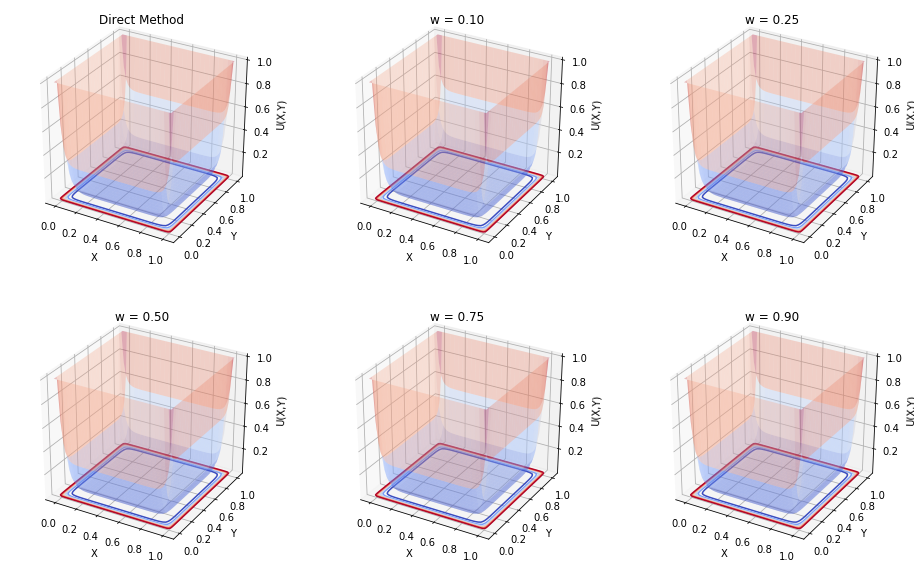

In [8]:
fig = plt.figure(figsize=(16,10))
L=1
N = 50
x_res = L/N
y_res = 1/N

x = np.linspace(-x_res, L+x_res, N+2)
y = np.linspace(-y_res, 1+y_res, N+2)
xx, yy = np.meshgrid(x,y)

ax = fig.add_subplot(2, 3, 1, projection='3d')
ax.plot_surface(xx, yy, u_first, alpha=0.3, cmap = 'coolwarm')
ax.contour(xx, yy, u_results[0], zdir='z', offset=0, cmap='coolwarm')
ax.set_title('Direct Method')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('U(X,Y)')

for i, val in enumerate( w_vals ):
    ax = fig.add_subplot(2, 3, i+2, projection='3d')
    ax.plot_surface(xx, yy, u_results[i], alpha=0.3, cmap = 'coolwarm')
    ax.contour(xx, yy, u_results[0], zdir='z', offset=0., cmap='coolwarm')
    ax.set_title('w = %3.2f'%val)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('U(X,Y)')
    
fig.savefig('schroe_alpha_1000.png')

In [57]:
#Conservative and Non-conservative forms

#Inviscid Burgers Equation

def cfl_burger(u, h):
    umax = np.amax(u)
    dt = h / (2*umax)
    return dt
    
def isVelocityPositive(cur, nex, prev, h):
    test = cur*((nex - prev) / (2*h))
    if test > 0:
        return True
    else:
        return False
    
def initial_burger(u, x):
    for i, val in enumerate(x):
        if val < 0:
            u[i] = 0
        else:
            u[i] = 1
    return u

def upwind_burger(u, h, N, x):   
    time = 0.
    file = open('upwind_burger%03d'%0+'.txt', 'w')
    file.write("time = %10.6f"%time+'\n')
    for i in range(1,N+1):
        file.write("%12.8f"%x[i])
        file.write("%12.8f"%u[i])
        file.write('\n')
    file.close()
        
    for n in range(24):
        file = open('upwind_burger%03d'%(n+1)+'.txt', 'w')
        
        u_new = np.zeros_like(u)
        dt = cfl_burger(u, h)
        
        for j in range(1,N+1):
            if isVelocityPositive(u[j], u[j+1], u[j-1], h) == True:
                u_new[j] = u[j] - (dt/h) * (0.5*u[j]**2 - 0.5*u[j-1]**2)
            else:
                u_new[j] = u[j] - (dt/h) * (0.5*u[j+1]**2 - 0.5*u[j]**2)
        u[:] = u_new
        u[0] = 0.
        u[-1] = 1.
        time += dt
        
        file.write("time = %10.6f"%time+'\n')
        for i in range(1,N+1):
            file.write("%12.8f"%x[i])
            file.write("%12.8f"%u[i])
            file.write('\n')
        file.close()
        
def lax_burger(u, h, N, x):
    time = 0.
    file = open('lax_burger%03d'%0+'.txt', 'w')
    file.write("time = %10.6f"%time+'\n')
    for i in range(1,N+1):
        file.write("%12.8f"%x[i])
        file.write("%12.8f"%u[i])
        file.write('\n')
    file.close()
    
    for n in range(24):
        file = open('lax_burger%03d'%n+'.txt', 'w')
        u_new = np.zeros_like(u)
        dt = cfl_burger(u, h)
    
        for j in range(1, N+1):
            u_new[j] = u[j] - (dt/(4*h))*(u[j+1]**2 - u[j-1]**2) + (dt**2/(4*h**2))*(u[j+1]-2*u[j]**2+u[j-1]**2)
        u[:] = u_new
        u[0] = 0.
        u[-1] = 1.
        time += dt
    
        file.write("time = %10.6f"%time+'\n')
        for i in range(1,N+1):
            file.write("%12.8f"%x[i])
            file.write("%12.8f"%u[i])
            file.write('\n')
        file.close()
        
xmin = -1.
xmax = 1.
N = 50
x_res = 1/50

x = np.linspace(xmin-x_res, xmax+x_res, N+2)
u = np.zeros_like(x)
u = initial_burger(u, x)

upwind_burger(u, x_res, N, x)
lax_burger(u, x_res, N, x)

here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
done


In [189]:
#Two-step Lax-Wendroff

def flux(j, u_on, u_off, v, h, half):
    """ Computes the flux of a conservative system. The flux equation will change
    depending on the exact eqation being considered. This is used by a 2-step LW
    function, so flux is calculated using staggered steps
    curr  = the current index being considered
    u_on  = the u values on the same grid as the flux being considered
    u_off = the u values on the grid a half step off the current flux grid being considered
    v     = the viscosity
    half  = bool for if the current grid being considered is on the half step or not
    h     = the x resolution of the grids
    f     = the flux at the curr location"""
    #note: the delta x between the half steps is half the defined resolution - cancels out the factor 2 from the CFD
    if half:
        f = 0.5*u_on[j]**2 - (v/h)*(u_off[j+1] - u_off[j])
    else:
        f = 0.5*u_on[j]**2 - (v/h)*(u_off[j] - u_off[j-1])
    return f

def initial_sin(u, x):
    '''The initial conditions for a conservative form system
    u - the variable grid
    x - the x coordinates of the variable grid'''
    for i, val in enumerate(x):
        u[i] = -np.sin(np.pi*val)
    return u

def lw2step(u, u_half, f, f_half, v, h, x, conserve, filename):
    '''Solves a conservation equation using the Lax-wendoff 2-step method. Assumes 
    u, f, u_half, x_half initial conditions have already been established.
    u -      the variable grid
    u_half - the variable grid one half time step ahead of u
    f -      the flux '''
    dt = 0.1
    time_steps = 20
    
    #Writes the data to a file for the initial conditions
    file = open(filename+'%03d'%0+'.txt', 'w')
    file.write("time = %10.6f"%0.0+'\n')
    for i in range(1,N+1):
        file.write("%12.8f"%x[i])
        file.write("%12.8f"%u[i])
        file.write('\n')
    file.close()
    
    u_new      = np.zeros_like(u)
    u_half_new = np.zeros_like(u_half)
    f_new      = np.zeros_like(f)
    f_half_new = np.zeros_like(f_half)
    
    for n in range(time_steps):
        #Solve for u and flux at a half-step forward in time
        for j, val in enumerate(u_half):
            u_half_new[j] = 0.5*(u[j+1] + u[j]) - (dt/(2*h))*(f[j+1] - f[j])
            
        for j, val in enumerate(f_half):
            if conserve == True:
                f_half_new[j] = flux_conserve(j,u)
            else:
                f_half_new[j] = flux(j, u_half, u, v, h, half=True)
        
        #Solve for u and flux at the next full step in time
        for j in range(1,N+1):
            u_new[j] = u[j] - (dt/h)*(f_half_new[j] - f_half_new[j-1])
            
        u_new[0]  = 0 #reset boundary conditions
        u_new[-1] = 0
        
        for j in range(1,N+1):
            if conserve == True:
                f_new = flux_conserve(j,u_new)
            else:
                f_new[j] = flux(j, u_new, u_half_new, v, h, half=False)
        
        #Advance dummy variables for potential next loop
        u[:] = u_new
        u_half[:] = u_half_new
        f[:] = f_new
        f_half[:] = f_half_new
        
        #write the results to a new file
        time = (n+1)*dt
        file = open(filename+'%03d'%(n+1)+'.txt', 'w')
        file.write("time = %10.6f"%time+'\n')
        for i in range(1,N+1):
            file.write("%12.8f"%x[i])
            file.write("%12.8f"%u[i])
            file.write('\n')
        file.close()

#Personal note: I was running short on time, so I copy pasted. A better approach in future would be to modify above:
#     first, add a kwarg for if the situation is conservative or not. add an if statement for both f update loops
#     second, add a arg for a file name

#set up our grids
xmin = -1.0
xmax = 1.0
N = 50
res = 2. / N
v = 10**(-2) / np.pi
x      = np.linspace(xmin-res, xmax+res, N+2)
x_half = np.linspace(xmin - res/2, xmax + res/2, N+1)

u      = np.zeros_like(x)
u_half = np.zeros_like(x_half)
u      = initial_sin(u,x)
u_half = initial_sin(u_half, x_half)

f      = np.zeros(N+2) #indices 0, -1 must not be accessed, as they can't be calculated. Left empty to keep same indices as u
f_half = np.zeros(N+1)

for i in range(1,N+1):
    f[i]      = flux(i, u, u_half, v, res, half=False)
    
for i in range(N+1):
    f_half[i] = flux(i, u_half, u, v, res, half=True )

lw2step(u, u_half, f, f_half, v, h ,x, conserve = True, filename = 'lw_2step_inv')
lw2step(u, u_half, f, f_half, v, h ,x, conserve = False, filename = 'lw_2step_vis')